In [2]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

# **Original Dataset**


In [3]:
#pip install opendatasets

In [4]:
#import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler# sklearn.preprocessing.RobustScaler
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [5]:
def counts(column_name):
  a = df_original[column_name].value_counts()
  return a

In [6]:
#od.download("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")

In [7]:
df_original = pd.read_csv("/content/adult.csv")

In [8]:
print(df_original.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-los', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')


In [9]:
df_original.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-los,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df_original.describe()

,age,fnlwgt,education-num,capital-gain,capital-los,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-los     32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
df_original.corr()

,age,fnlwgt,education-num,capital-gain,capital-los,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-los,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [13]:
print('Income Less than 50k' , (df_original.Income.value_counts()[0]/len(df_original))*100,'%')
print('Income More than 50k' , (df_original.Income.value_counts()[1]/len(df_original))*100,'%')

Income Less than 50k 75.91904425539757 %
Income More than 50k 24.080955744602438 %


In [14]:
print(len(df_original))

32561


# EDA

### Removing columns -'Capital-gain' , 'Capital-los'


In [15]:
df_original.drop(['capital-gain','capital-los','fnlwgt','relationship'], axis=1,inplace = True)
df_original.head(5)

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K


### Replacing missing values of 'workclass' with mode

In [16]:
def replace_nan_with_mode(column_names,df):
    for column_name in df.columns:
        mode_value = df[column_name].mode()[0]
        df[column_name] = df[column_name].replace("?", mode_value)
    return

li = ["occupation"]
replace_nan_with_mode(li,df_original)
counts('occupation')

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

### Binning the categories

#### Education

In [17]:
li1 = ["Doctorate","Prof-school"]
li2 = ['11th','10th',"9th","12th"]
li3 = ["5th-6th","1st-4th","Preschool","7th-8th"]
df_original['education'] = df_original['education'].replace(li1, "PHD lvl")
df_original['education'] = df_original['education'].replace(li2, "High school")
df_original['education'] = df_original['education'].replace(li3, "Junior school")
counts('education')

HS-grad          10501
Some-college      7291
Bachelors         5355
High school       3055
Masters           1723
Assoc-voc         1382
Junior school     1198
Assoc-acdm        1067
PHD lvl            989
Name: education, dtype: int64

#### Marital Status

In [18]:
li = ["Never-married","Separated","Married-spouse-absent","Married-civ-spouse"]
df_original['marital-status'] = df_original['marital-status'].replace(li, "Single")
counts('marital-status')

Single               27102
Divorced              4443
Widowed                993
Married-AF-spouse       23
Name: marital-status, dtype: int64

#### Native Country

In [19]:
df_original[['native-country']]=df_original[['native-country']]=='United-States'
counts('native-country')

True     29753
False     2808
Name: native-country, dtype: int64

In [20]:
df_original['native-country'] = df_original['native-country'].replace([True,False],['US','Non-US'])
df_original.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,Income
0,39,State-gov,Bachelors,13,Single,Adm-clerical,White,Male,40,US,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Single,Exec-managerial,White,Male,13,US,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,40,US,<=50K
3,53,Private,High school,7,Single,Handlers-cleaners,Black,Male,40,US,<=50K
4,28,Private,Bachelors,13,Single,Prof-specialty,Black,Female,40,Non-US,<=50K


#### Education Num

In [21]:
df_original['education-num'] = df_original['education-num'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],[1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,3])
counts('education-num')

2    20333
3    10516
1     1712
Name: education-num, dtype: int64

#### Workclass

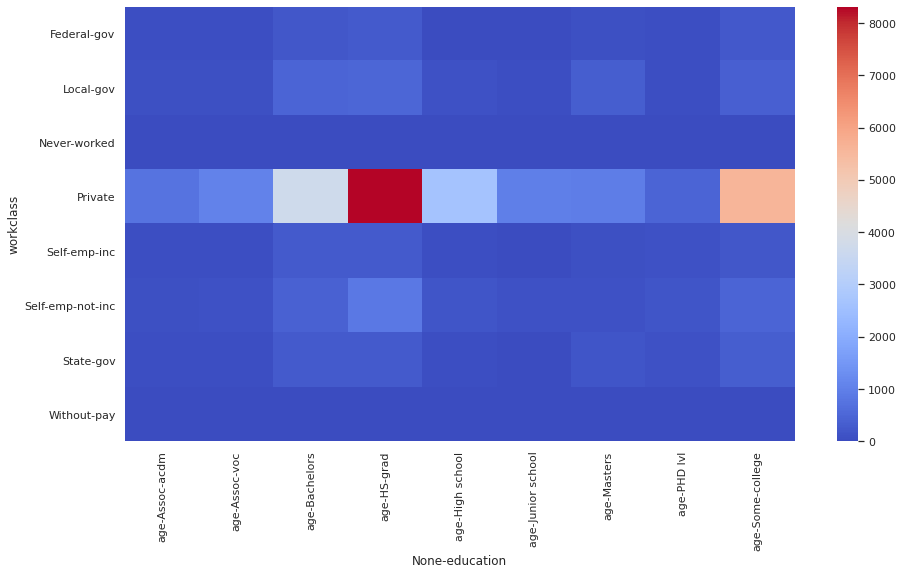

In [22]:
group8 = df_original.groupby((['workclass','education']))['age'].count()
group8 = group8.to_frame()
group8 = pd.pivot_table(group8,index='workclass',columns='education')
group8.replace(np.nan,0,inplace=True)

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(group8,cmap='coolwarm')

In [23]:
df_original[['workclass']]=df_original[['workclass']]=='Private'
counts('workclass')

True     24532
False     8029
Name: workclass, dtype: int64

In [24]:
df_original['workclass'] = df_original['workclass'].replace([True,False],['Private','Non-Private'])
df_original.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,Income
0,39,Non-Private,Bachelors,3,Single,Adm-clerical,White,Male,40,US,<=50K
1,50,Non-Private,Bachelors,3,Single,Exec-managerial,White,Male,13,US,<=50K
2,38,Private,HS-grad,2,Divorced,Handlers-cleaners,White,Male,40,US,<=50K
3,53,Private,High school,2,Single,Handlers-cleaners,Black,Male,40,US,<=50K
4,28,Private,Bachelors,3,Single,Prof-specialty,Black,Female,40,Non-US,<=50K


#### Race

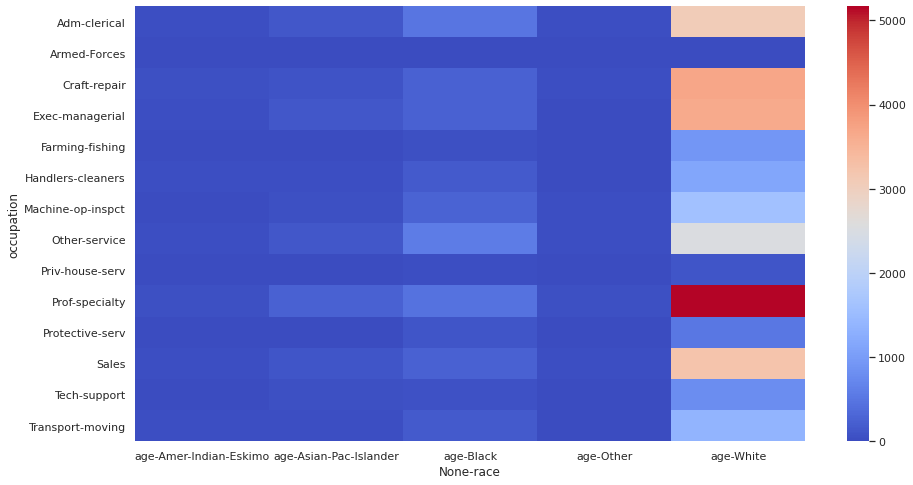

In [25]:
group9 = df_original.groupby((['occupation','race']))['age'].count()
group9 = group9.to_frame()
group9 = pd.pivot_table(group9,index='occupation',columns='race')
group9.replace(np.nan,0,inplace=True)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(group9,cmap='coolwarm')

In [26]:
df_original[['race']]=df_original[['race']]=='White'
counts('race')

True     27816
False     4745
Name: race, dtype: int64

In [27]:
df_original['race'] = df_original['race'].replace([True,False],['White','Not-White'])
df_original.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,Income
0,39,Non-Private,Bachelors,3,Single,Adm-clerical,White,Male,40,US,<=50K
1,50,Non-Private,Bachelors,3,Single,Exec-managerial,White,Male,13,US,<=50K
2,38,Private,HS-grad,2,Divorced,Handlers-cleaners,White,Male,40,US,<=50K
3,53,Private,High school,2,Single,Handlers-cleaners,Not-White,Male,40,US,<=50K
4,28,Private,Bachelors,3,Single,Prof-specialty,Not-White,Female,40,Non-US,<=50K


### **Removing the outliers**


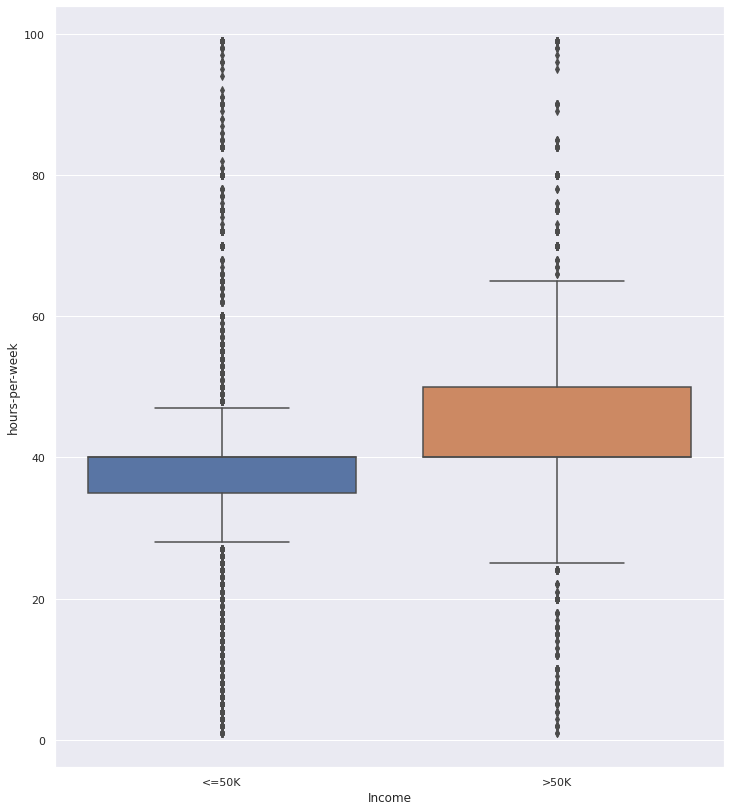

In [28]:
plt.figure(figsize=(12,14))
sns.boxplot(x=df_original['Income'],y =df_original["hours-per-week"])

In [29]:
# Removing outliers
# IQR
Q1 = np.percentile(df_original[["hours-per-week"]], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df_original[["hours-per-week"]], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df_original.shape) 
  
# Upper bound
upper = np.where(df_original[["hours-per-week"]] >= (Q3+5*IQR))
# Lower bound
lower = np.where(df_original[["hours-per-week"]] <= (Q1-5*IQR))

print(upper[0].shape) 
print(lower[0].shape)

# ''' Removing the Outliers '''
# df_original.drop(upper[0], inplace = True)
# # df_original.drop(lower[0], inplace = True)
  
# print("New Shape: ", df_original.shape) 

Old Shape:  (32561, 11)
(789,)
(1381,)


### Scaling the columns

In [30]:
scaler1 = StandardScaler()
scaler1.fit(df_original[['hours-per-week']])
df_original[["hours-per-week"]]  = scaler1.transform(df_original[["hours-per-week"]])


In [31]:
scaler2 = StandardScaler()
scaler2.fit(df_original[["age"]] )
df_original[["age"]]  = scaler2.transform(df_original[["age"]])

### Distributions

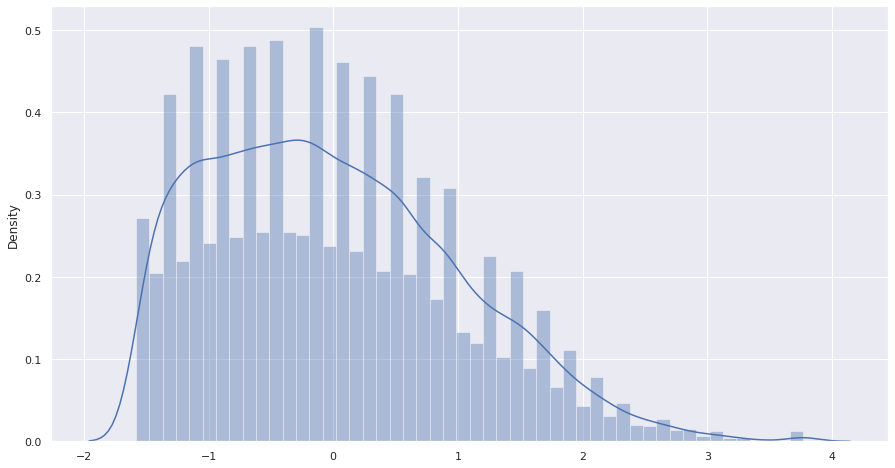

In [32]:
sns.distplot(df_original[["age"]])

hours-per-week    0.227643
dtype: float64
No skewness


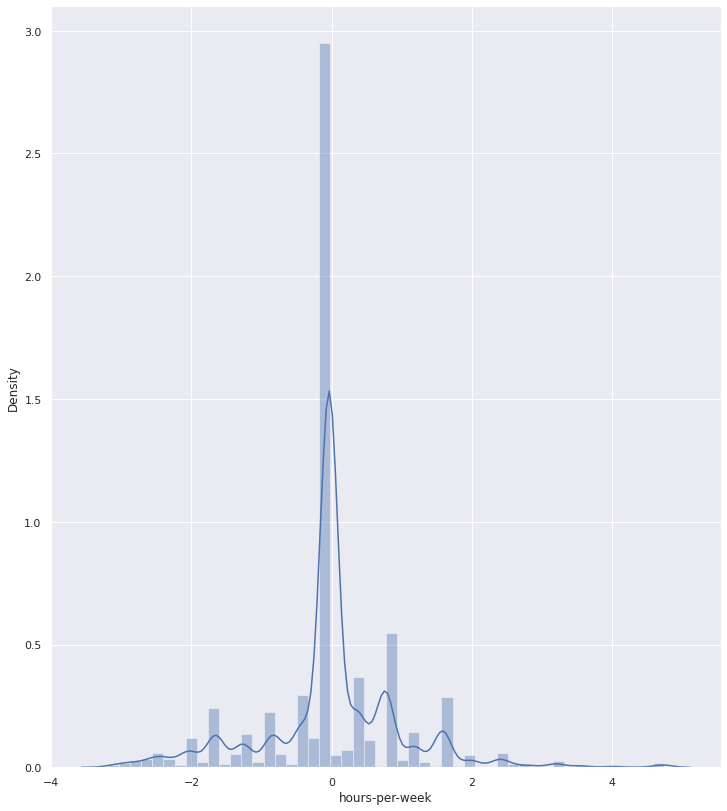

In [33]:
plt.figure(figsize=(12,14))
sns.distplot(df_original['hours-per-week'])
print(df_original[["hours-per-week"]].skew())
#sns.distplot(df_original[["capital-los"]])
print("No skewness")

# **Pivot tables**

In [34]:
df_original.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,Income
0,0.030671,Non-Private,Bachelors,3,Single,Adm-clerical,White,Male,-0.035429,US,<=50K
1,0.837109,Non-Private,Bachelors,3,Single,Exec-managerial,White,Male,-2.222153,US,<=50K
2,-0.042642,Private,HS-grad,2,Divorced,Handlers-cleaners,White,Male,-0.035429,US,<=50K
3,1.057047,Private,High school,2,Single,Handlers-cleaners,Not-White,Male,-0.035429,US,<=50K
4,-0.775768,Private,Bachelors,3,Single,Prof-specialty,Not-White,Female,-0.035429,Non-US,<=50K


In [35]:
group1 = df_original.groupby((['Income','workclass']))['age'].count()
group1 = group1.to_frame()
pd.pivot_table(group1,index='Income',columns='workclass')


age        
workclass Non-Private Private
Income                       
<=50K            5342   19378
>50K             2687    5154

In [36]:
group2 = df_original.groupby((['Income','education']))['age'].count()
group2 = group2.to_frame()
pd.pivot_table(group2,index='Income',columns='education')


age                                                        \
education Assoc-acdm Assoc-voc Bachelors HS-grad High school Junior school   
Income                                                                       
<=50K            802      1021      3134    8826        2873          1136   
>50K             265       361      2221    1675         182            62   

                                        
education Masters PHD lvl Some-college  
Income                                  
<=50K         764     260         5904  
>50K          959     729         1387

In [37]:
group4 = df_original.groupby((['Income','marital-status']))['age'].count()
group4 = group4.to_frame()
pd.pivot_table(group4,index='Income',columns='marital-status')

age                                 
marital-status Divorced Married-AF-spouse Single Widowed
Income                                                  
<=50K              3980                13  19819     908
>50K                463                10   7283      85

In [38]:
group5 = df_original.groupby((['Income','occupation']))['age'].count()
group5 = group5.to_frame()
pd.pivot_table(group5,index='Income',columns='occupation')

age                                            \
occupation Adm-clerical Armed-Forces Craft-repair Exec-managerial   
Income                                                              
<=50K              3263            8         3170            2098   
>50K                507            1          929            1968   

                                                                              \
occupation Farming-fishing Handlers-cleaners Machine-op-inspct Other-service   
Income                                                                         
<=50K                  879              1284              1752          3158   
>50K                   115                86               250           137   

                                                                              \
occupation Priv-house-serv Prof-specialty Protective-serv Sales Tech-support   
Income                                                                         
<=50K                  148           3933             438  2667          645   
>50K                     1           2050             211   983          283   

                             
occupation Transport-moving  
Income                       
<=50K                  1277  
>50K                    320

In [39]:
group6 = df_original.groupby((['Income','sex']))['age'].count()
group6 = group6.to_frame()
pd.pivot_table(group6,index='Income',columns='sex')

age       
sex    Female   Male
Income              
<=50K    9592  15128
>50K     1179   6662

In [40]:
group7 = df_original.groupby((['occupation','education']))['age'].count()
group7 = group7.to_frame()
group7 = pd.pivot_table(group7,index='occupation',columns='education')
group7.replace(np.nan,0,inplace=True)

In [41]:
df = df_original[['occupation','education']].groupby(['occupation','education']).size().unstack(level=0)
df.replace(np.nan,0,inplace=True)

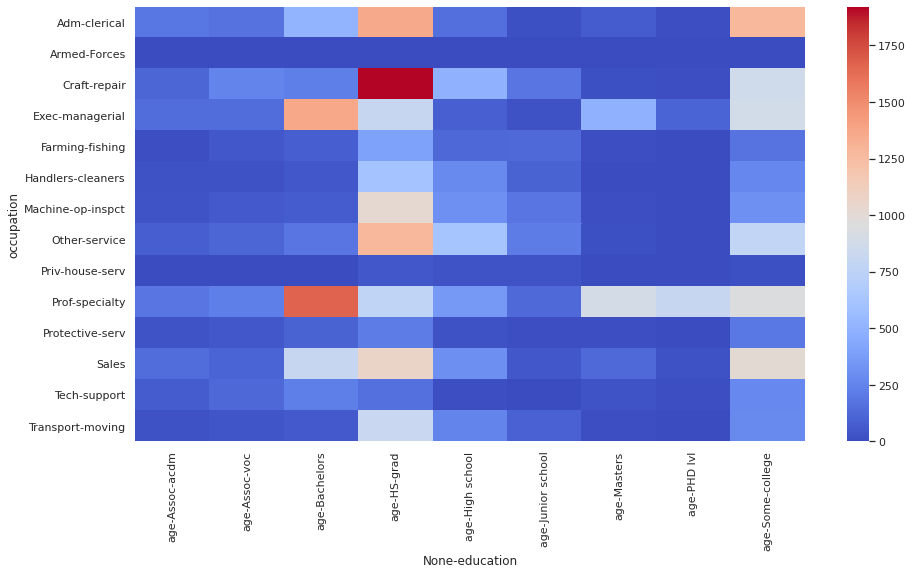

In [42]:
#df = df_original[["Profession","Segmentation"]].groupby(["Profession", "Segmentation"]).size().unstack(level=0)
# print(train_data_viz["Profession"].unique())
# for profession in train_data_viz["Profession"].unique():
#     df[profession] = df[profession]/sum(df[profession])
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(group7,cmap='coolwarm')

# **Features Extraction & Encoding**

In [43]:
df_original.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,Income
0,0.030671,Non-Private,Bachelors,3,Single,Adm-clerical,White,Male,-0.035429,US,<=50K
1,0.837109,Non-Private,Bachelors,3,Single,Exec-managerial,White,Male,-2.222153,US,<=50K
2,-0.042642,Private,HS-grad,2,Divorced,Handlers-cleaners,White,Male,-0.035429,US,<=50K
3,1.057047,Private,High school,2,Single,Handlers-cleaners,Not-White,Male,-0.035429,US,<=50K
4,-0.775768,Private,Bachelors,3,Single,Prof-specialty,Not-White,Female,-0.035429,Non-US,<=50K


In [44]:
features = df_original

In [45]:
counts('Income')

<=50K    24720
>50K      7841
Name: Income, dtype: int64

In [46]:
features['race']  = features['race'].replace(['White','Not-White'],[1,0])
features['sex']   = features['sex'].replace(['Male','Female'],[1,0])
features['workclass'] = features['workclass'].replace(['Private','Non-Private'],[1,0])
features['native-country'] = features['native-country'].replace(['US','Non-US'],[1,0])
features['Income'] = features['Income'].replace(['<=50K','>50K'],[0,1])
features.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,Income
0,0.030671,0,Bachelors,3,Single,Adm-clerical,1,1,-0.035429,1,0
1,0.837109,0,Bachelors,3,Single,Exec-managerial,1,1,-2.222153,1,0
2,-0.042642,1,HS-grad,2,Divorced,Handlers-cleaners,1,1,-0.035429,1,0
3,1.057047,1,High school,2,Single,Handlers-cleaners,0,1,-0.035429,1,0
4,-0.775768,1,Bachelors,3,Single,Prof-specialty,0,0,-0.035429,0,0


In [47]:
lis1 =counts('marital-status').index
lis2 =counts('occupation').index
lis3 =counts('education').index

In [48]:
features['marital-status'] = features['marital-status'].replace(lis1,[1,2,3,4])
features['occupation'] = features['occupation'].replace(lis2,[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
features['education'] = features['education'].replace(lis3,[1,2,3,4,5,6,7,8,9])

In [49]:
features.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,Income
0,0.030671,0,3,3,1,4,1,1,-0.035429,1,0
1,0.837109,0,3,3,1,3,1,1,-2.222153,1,0
2,-0.042642,1,1,2,2,9,1,1,-0.035429,1,0
3,1.057047,1,4,2,1,9,0,1,-0.035429,1,0
4,-0.775768,1,3,3,1,1,0,0,-0.035429,0,0


In [50]:
X= features.drop(['Income'],axis=1)
y = features['Income']

In [51]:
X.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country
0,0.030671,0,3,3,1,4,1,1,-0.035429,1
1,0.837109,0,3,3,1,3,1,1,-2.222153,1
2,-0.042642,1,1,2,2,9,1,1,-0.035429,1
3,1.057047,1,4,2,1,9,0,1,-0.035429,1
4,-0.775768,1,3,3,1,1,0,0,-0.035429,0


In [52]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# **Model Training**

In [54]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5,)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 80.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 80.0 % accuracy score
Classifiers:  SVC Has a training score of 81.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 76.0 % accuracy score


# **Accuracy Report**

In [56]:
# !pip install pycaret
from pycaret import classification

In [58]:
modified_data = pd.concat((X,y),axis=1)
classification_setup = classification.setup(data= modified_data, target='Income')
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8224,0.8626,0.5062,0.6698,0.5763,0.4667,0.4743,0.300
gbc,Gradient Boosting Classifier,0.8212,0.8622,0.4721,0.6813,0.5573,0.4499,0.4620,1.786
ada,Ada Boost Classifier,0.8194,0.8593,0.4869,0.6666,0.5626,0.4523,0.4612,0.638
lr,Logistic Regression,0.8130,0.8433,0.4397,0.6638,0.5288,0.4181,0.4320,0.663
lda,Linear Discriminant Analysis,0.8112,0.8386,0.4414,0.6556,0.5273,0.4150,0.4278,0.159
ridge,Ridge Classifier,0.8102,0.0000,0.3722,0.6896,0.4833,0.3795,0.4067,0.042
svm,SVM - Linear Kernel,0.8069,0.0000,0.4256,0.6530,0.5086,0.3964,0.4137,0.123
knn,K Neighbors Classifier,0.7994,0.8001,0.5057,0.5942,0.5462,0.4186,0.4209,1.324
rf,Random Forest Classifier,0.7938,0.8199,0.4972,0.5797,0.5351,0.4037,0.4058,1.944
et,Extra Trees Classifier,0.7847,0.7728,0.4789,0.5574,0.5150,0.3777,0.3796,2.114


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3936, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# Gradient Boosting Classifier has highest accuracy of 82%